# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
import numpy as np
import pandas as pb

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
temp = pb.read_csv("./Temp_States.csv")

#### Print `temp`

In [7]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [8]:
print(temp.dtypes)

City            object
State           object
Temperature    float64
dtype: object


#### Select the rows where state is New York

In [10]:
ny_cities = temp[temp["State"] == "New York"]

#### What is the average of the temperature of cities in New York?

In [12]:
ny_cities["Temperature"].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [13]:
temp_above_15 = temp[temp["Temperature"] > 15]

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [14]:
temp_above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [17]:
temp_above_15_below_20 = temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]
temp_above_15_below_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


In [16]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [19]:
mean_temp_by_state = temp.groupby('State')['Temperature'].mean()
std_dev_temp_by_state = temp.groupby('State')['Temperature'].std()

print("Mean temperature by state:")
print(mean_temp_by_state)
print("\nStandard deviation of temperature by state:")
print(std_dev_temp_by_state)

Mean temperature by state:
State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

Standard deviation of temperature by state:
State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [20]:
employee = pb.read_csv("./Employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [21]:
print(employee.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [24]:
print(employee.head(10))

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


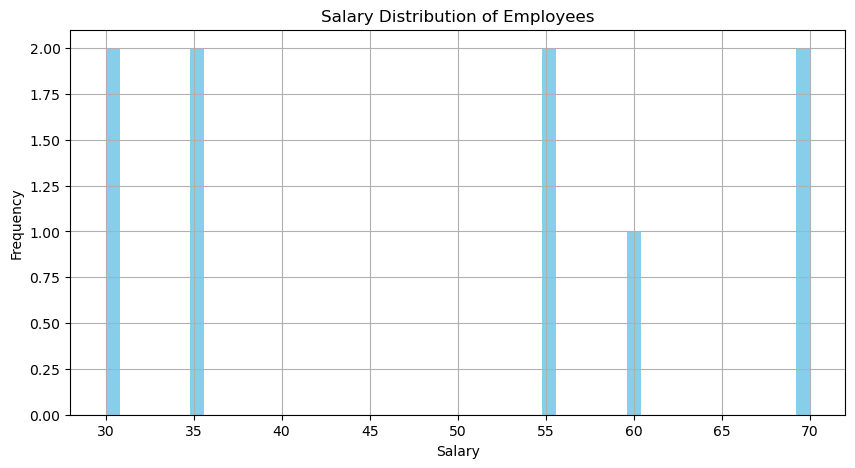

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(employee["Salary"], bins=50, color='skyblue')
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

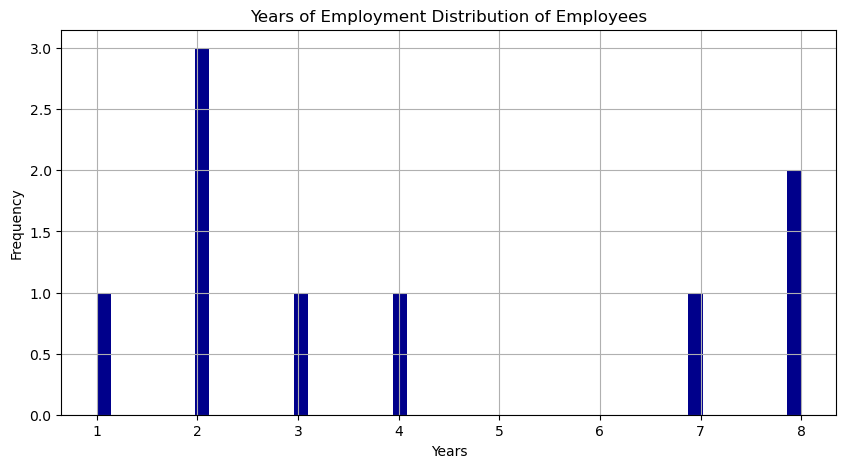

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(employee["Years"], bins=50, color='darkblue')
plt.title('Years of Employment Distribution of Employees')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### What's the average salary in this company?

In [31]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [32]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [33]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [35]:
employee[employee['Salary'] == employee['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [38]:
david = employee[employee['Name'] == 'David']
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [39]:
david_salary = david['Salary']
david_salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [41]:
associate = employee[employee["Title"] == "associate"]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [42]:
print(employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [43]:
print(employee[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [45]:
title = "associate"
salary = 55

found_employee = employee[(employee["Title"] == title) & (employee['Salary'] > salary)]
found_employee

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [54]:
mean_salary_by_year = employee.groupby('Years')['Salary'].mean()
mean_salary_by_year

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [56]:
mean_salary_by_title = employee.groupby('Title')['Salary'].mean()
mean_salary_by_title

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

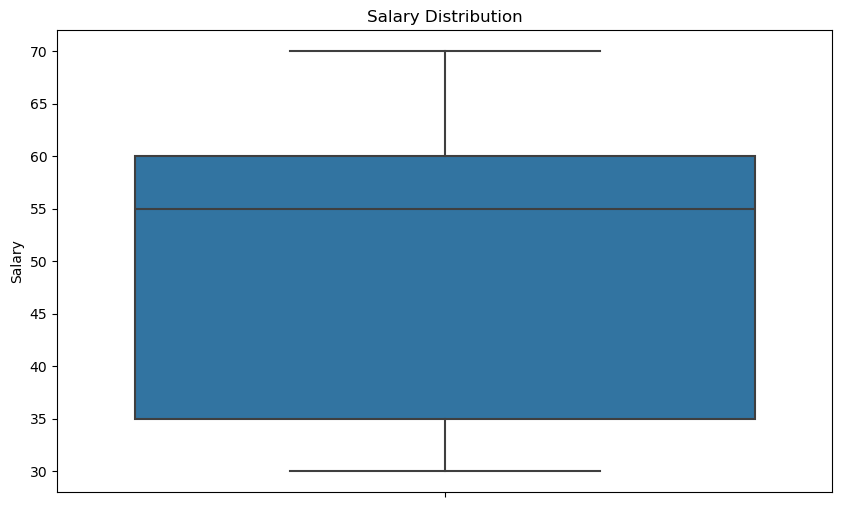

In [58]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(y=employee['Salary'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.show()


In [59]:
# print first quartile hereQ1 = df['Salary'].quantile(0.25)
Q1 = employee['Salary'].quantile(0.25)

print(f"First Quartile (Q1): {Q1}")


First Quartile (Q1): 35.0


In [60]:
Q3 = employee['Salary'].quantile(0.75)

print(f"Third Quartile (Q3): {Q3}")

Third Quartile (Q3): 60.0


#### Is the mean salary per gender different?

In [62]:
mean_salary_by_gender = employee.groupby('Gender')['Salary'].mean()
mean_salary_by_gender

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

In [ ]:
# Mean salary by gender differs by 2.5k with males earning more. 

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [64]:
department_stats = employee.groupby('Department').agg({
    'Years': ['min', 'max', 'mean'],
    'Salary': ['min', 'max', 'mean']
})
department_stats

Years               Salary           
             min max      mean    min max   mean
Department                                      
HR             2   8  4.666667     30  70  45.00
IT             1   8  4.500000     30  70  48.75
Sales          2   3  2.500000     55  55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [82]:
salary_diff = employee.groupby('Department').agg(
    max_salary = ('Salary', 'max'),
    min_salary= ('Salary', 'min'),
    salary_range=('Salary', lambda x: x.max() - x.min())
)
salary_diff


,max_salary,min_salary,salary_range
Department,,,
HR,70,30,40
IT,70,30,40
Sales,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [92]:

orders = pb.read_csv('./Orders.csv')
orders.drop(columns=['Unnamed: 0'], inplace=True)
orders.head(10)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [93]:
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [94]:
orders.describe()

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [102]:
purchase_price_by_invoice = orders.groupby('InvoiceNo')['amount_spent'].sum()
print(purchase_price_by_invoice)
avg_purchase_price = purchase_price_by_invoice.mean()
avg_purchase_price


InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
           ...  
581583    124.60
581584    140.64
581585    329.05
581586    339.20
581587    249.45
Name: amount_spent, Length: 18536, dtype: float64


480.7621873111782

#### What were the highest and lowest purchase prices? 

In [103]:
purchase_price_by_invoice.max()

168469.6

In [104]:
purchase_price_by_invoice.min()

0.0

#### Select all the customers we have in Spain

In [119]:
spain_orders = orders[orders['Country'] == 'Spain']
spain_orders.head(20)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
13974,538095,22504,2010,12,4,14,cabin bag vintage retrospot,1,2010-12-09 14:55:00,29.95,17097,Spain,29.95
13975,538095,22212,2010,12,4,14,four hook white lovebirds,1,2010-12-09 14:55:00,2.10,17097,Spain,2.10
13976,538095,22953,2010,12,4,14,birthday party cordon barrier tape,1,2010-12-09 14:55:00,1.25,17097,Spain,1.25
13977,538095,84818,2010,12,4,14,danish rose photo frame,1,2010-12-09 14:55:00,2.55,17097,Spain,2.55
13978,538095,21114,2010,12,4,14,lavender scented fabric heart,5,2010-12-09 14:55:00,1.25,17097,Spain,6.25


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [123]:
num_customers = spain_orders['CustomerID'].value_counts().count()
print("Number of customers in Spain:", num_customers)


Number of customers in Spain: 30


#### Select all the customers who have bought more than 50 items ?

In [129]:
# Does this refer to more than 50 items total or more than 50 of an individual item?
quantity_by_invoice = orders.groupby('InvoiceNo')['Quantity'].sum()
# print(quantity_by_invoice)
quantity_over_50 = quantity_by_invoice[quantity_by_invoice > 50]
quantity_over_50

InvoiceNo
536367     83
536370    449
536371     80
536373     88
536375     88
         ... 
581583     76
581584    120
581585    278
581586     66
581587    105
Name: Quantity, Length: 15426, dtype: int64

#### Select orders from Spain that are above 50 items

In [131]:
orders_over_fifty = orders[orders['InvoiceNo'].isin(quantity_over_50.index)]
from_spain_over_fifty = orders_over_fifty[orders_over_fifty['Country'] == 'Spain']
from_spain_over_fifty

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### Select all free orders

In [132]:
free_orders = orders[orders['UnitPrice'] == 0]
free_orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [133]:
lunch_bag_orders = orders[orders['Description'].str.contains('lunch bag', case=False)]
lunch_bag_orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [135]:
lunch_bag_orders_2011 = lunch_bag_orders[lunch_bag_orders['year'] == 2011]
lunch_bag_orders_2011

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

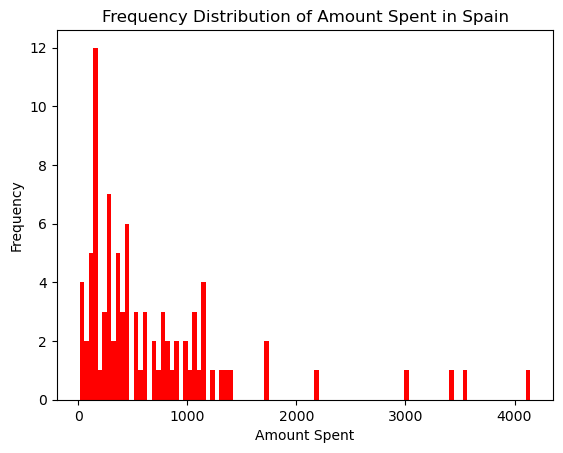

In [146]:
spain_orders_by_invoice = spain_orders.groupby('InvoiceNo')['amount_spent'].sum()
plt.hist(spain_orders_by_invoice, bins=100, color='red')
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

#### Select all orders made in the month of August

In [148]:
august_orders = orders[orders['month'] == 8]
august_orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [150]:
orders_by_country_august = august_orders['Country'].value_counts()
orders_by_country_august

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [152]:
total_spent_per_country = orders.groupby('Country')['amount_spent'].median()
total_spent_per_country

Country
Australia               66.00
Austria                 17.17
Bahrain                 25.50
Belgium                 16.60
Brazil                  19.65
Canada                  16.50
Channel Islands         17.70
Cyprus                  16.50
Czech Republic          31.20
Denmark                 23.40
EIRE                    17.40
European Community      17.70
Finland                 17.85
France                  16.60
Germany                 17.00
Greece                  16.60
Iceland                 17.00
Israel                  19.23
Italy                   17.70
Japan                   70.20
Lebanon                 31.60
Lithuania               45.00
Malta                   17.20
Netherlands             91.80
Norway                  19.80
Poland                  17.40
Portugal                16.50
RSA                     16.50
Saudi Arabia            17.70
Singapore               36.75
Spain                   15.00
Sweden                  31.50
Switzerland             17.70
US

#### What's the most expensive item?

In [154]:
print(orders[orders['UnitPrice'] == orders['UnitPrice'].max()])

        InvoiceNo StockCode  year  month  day  hour Description  Quantity  \
118352     551697      POST  2011      5    2    13     postage         1   

                InvoiceDate  UnitPrice  CustomerID         Country  \
118352  2011-05-03 13:46:00    8142.75       16029  United Kingdom   

        amount_spent  
118352       8142.75  


#### What was the average amount spent per year ?

In [158]:
avg_per_year = orders.groupby('year')['amount_spent'].median()
avg_per_year

year
2010    10.5
2011    11.9
Name: amount_spent, dtype: float64